<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%90%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BF%D0%BE%D1%80%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Адаптивная пороговая обработка

# Adaptive Threshold Processing


В этом уроке мы будем учиться использовать адаптивную пороговую обработку (для сегментации изображений в дальнейшем)

In this lesson we will learn how to use adaptive thresholding (for further image segmentation)

В прошлом уроке мы изучили пороговую обработку Оцу. Там оператор использовал глобальный порог для всех пикселей. Адаптивная же пороговая обработка изменяет порог динамически по всему изображению. Эта более сложная версия обработки может учитывать изменяющиеся условия освещения на изображении, например, возникающие в результате сильного градиента освещенности или теней.


In the last lesson, we studied the Otsu thresholding. There, the operator used a global threshold for all pixels. Adaptive threshold processing, on the other hand, changes the threshold dynamically throughout the image. This more sophisticated version of processing can take into account changing lighting conditions in the image, such as those resulting from a strong gradient of light or shadows.

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_20.Thresholding_adaptive.zip
!unzip Lesson_20.Thresholding_adaptive.zip
%cd /content/Lesson_20.Thresholding_adaptive

--2022-02-01 18:40:46--  http://dataudt.ru/datasets/cv/Lesson_20.Thresholding_adaptive.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400177 (391K) [application/zip]
Saving to: ‘Lesson_20.Thresholding_adaptive.zip’

Lesson_20.Threshold 100%[===================>] 390.80K   795KB/s    in 0.5s    

2022-02-01 18:40:47 (795 KB/s) - ‘Lesson_20.Thresholding_adaptive.zip’ saved [400177/400177]

Archive:  Lesson_20.Thresholding_adaptive.zip
  inflating: Lesson_20.Thresholding_adaptive/car_plate_01.png  
  inflating: Lesson_20.Thresholding_adaptive/car_plate_02.png  
  inflating: Lesson_20.Thresholding_adaptive/Thresholding_adaptive.py  
/content/Lesson_20.Thresholding_adaptive


In [2]:
# для корректной работы программы
# нужно установить модуль scikit-image
!pip install scikit-image

In [3]:
# импортируем необходимые модули
# import the necessary packages
from skimage.filters import threshold_local
import cv2
from google.colab.patches import cv2_imshow

In [4]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments
args = {
  # путь к входному изображению
  # path to input image
  "image" : "car_plate_01.png"  
}

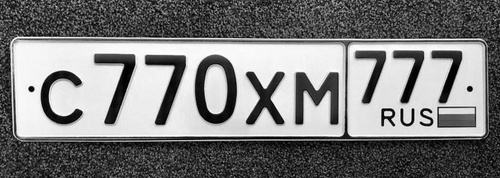

In [5]:
# загружаем изображение, конвертируем его 
# в градации серого и слегка размываем
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)

OpenCV Mean Thresh


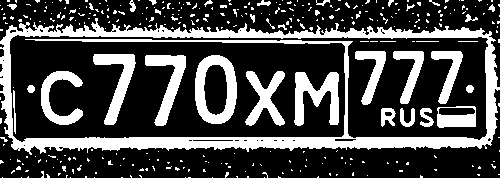

In [6]:
# Вместо того, чтобы вручную указывать пороговое значение,
# мы можем использовать адаптивную пороговую обработку 
# для изучения окрестностей пикселей и адаптивного порогового
# значения для каждого соседства.
# В этом примере мы вычислим среднее значение области 
# соседства в 25 пикселей и порог на основе этого значения;
# наконец, наша константа C вычитается 
# из среднего (в данном случае 15)
# instead of manually specifying the threshold value, we can use adaptive
# thresholding to examine neighborhoods of pixels and adaptively threshold
# each neighborhood -- in this example, we'll calculate the mean value
# of the neighborhood area of 25 pixels and threshold based on that value;
# finally, our constant C is subtracted from the mean calculation (in this
# case 15)
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
print("OpenCV Mean Thresh")
cv2_imshow(thresh)


scikit-image Mean Thresh


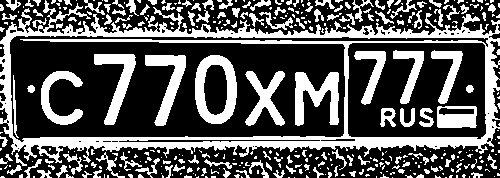

(178, 500)


In [7]:
# лично я предпочитаю адаптивную пороговую обработку scikit-image,
# просто она кажется намного более "питонической"
# personally, I prefer the scikit-image adaptive thresholding, it just
# feels a lot more "Pythonic"
T = threshold_local(blurred, 29, offset=5, method="gaussian")
thresh = (blurred < T).astype("uint8") * 255
print("scikit-image Mean Thresh")
cv2_imshow(thresh)
print(thresh.shape)